In [28]:
# Dependencies
import random
import requests
import pandas as pd
import datetime as dt
from time import strftime, gmtime
import openweathermapy.core as owm
import matplotlib.pyplot as plt
from config import api_key
from citipy import citipy
import numpy as np
import csv
from PIL import Image

In [29]:
column_names = ["City", "Country"]
weather_cities_df = pd.DataFrame(columns=column_names)
weather_cities_df

,City,Country


In [30]:
# Randomly generate a list of 1500 cities. Use 10 to test. 50 is good to test for duplicates. 
for x in range(750):
    lat = np.random.uniform(low=-90.000, high=90.000) 
    lon = np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lon)
    weather_cities_df = weather_cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)
weather_cities_df.tail(10)

,City,Country
740,rincon,an
741,sao miguel,br
742,marsa matruh,eg
743,hobart,au
744,saravena,co
745,maiduguri,ng
746,bagotville,ca
747,belaya gora,ru
748,nizhneyansk,ru
749,tuktoyaktuk,ca


In [31]:
# set up list to hold response info  
column_names = ["City", "Country","Latitude", "Longitude","Temperature","Humidity","Cloudiness","Wind Speed", "Date Time"]
cities_df = pd.DataFrame(columns=column_names)
cities_df

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date Time


In [32]:
#Pulling Data From openweathermap api
import datetime as dt
import time
start_time = time.time()
index = 1

for city in weather_cities_df["City"]:
    url = "http://api.openweathermap.org/data/2.5/weather?&q="
    query_url = url + city.replace(" ","+") + "&units=imperial&appid=" + api_key
    response = requests.get(query_url).json()
    status_code = response["cod"]
    
    if status_code =="404":
        print("city not found....skipping")
          
    else:
        cities_df.set_value(index,"City" ,response['name'])
        cities_df.set_value(index,"Country",response["sys"]["country"])
        cities_df.set_value(index,"Latitude",response["coord"]["lat"])
        cities_df.set_value(index, "Longitude",response["coord"]["lon"])
        cities_df.set_value(index, "Temperature",response['main']['temp'])
        cities_df.set_value(index, "Humidity", response['main']['humidity'])
        cities_df.set_value(index, "Cloudiness",response['clouds']['all'])
        cities_df.set_value(index, "Wind Speed",response['wind']['speed'])
        cities_df.set_value(index, "Date Time",dt.datetime.fromtimestamp(int(response["dt"])).strftime('%Y-%m-%d %H:%M:%S'))
        
        print(index,"City count , City_id:",response["id"])
        print("City Name:" , response["name"])
        print(query_url)
        index = index + 1
        time.sleep(1)
        
    print("---%s seconds ---" %(time.time()-start_time))
    

/Users/chandra/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/chandra/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/chandra/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/chandra/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/chandra/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[

1 City count , City_id: 3874787
City Name: Punta Arenas
http://api.openweathermap.org/data/2.5/weather?&q=punta+arenas&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---1.2064738273620605 seconds ---
2 City count , City_id: 3831208
City Name: Qaanaaq
http://api.openweathermap.org/data/2.5/weather?&q=qaanaaq&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---2.406993865966797 seconds ---
3 City count , City_id: 2450173
City Name: Taoudenni
http://api.openweathermap.org/data/2.5/weather?&q=taoudenni&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---3.6117897033691406 seconds ---
city not found....skipping
---3.733088970184326 seconds ---
4 City count , City_id: 4030556
City Name: Rikitea
http://api.openweathermap.org/data/2.5/weather?&q=rikitea&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---4.975283861160278 seconds ---
city not found....skipping
---5.082274675369263 seconds ---
5 City count , City_id: 3466165
City Name: Cidreira
http://api.openweathermap.or

40 City count , City_id: 4501427
City Name: Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?&q=port+elizabeth&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---50.3544340133667 seconds ---
41 City count , City_id: 3874787
City Name: Punta Arenas
http://api.openweathermap.org/data/2.5/weather?&q=punta+arenas&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---51.462230920791626 seconds ---
city not found....skipping
---51.56984090805054 seconds ---
42 City count , City_id: 3366880
City Name: Hermanus
http://api.openweathermap.org/data/2.5/weather?&q=hermanus&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---52.6745400428772 seconds ---
city not found....skipping
---52.78131675720215 seconds ---
43 City count , City_id: 2120591
City Name: Tilichiki
http://api.openweathermap.org/data/2.5/weather?&q=tilichiki&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---53.989675998687744 seconds ---
44 City count , City_id: 2126123
City Name: Chokurdakh
http://

79 City count , City_id: 2729907
City Name: Longyearbyen
http://api.openweathermap.org/data/2.5/weather?&q=longyearbyen&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---97.60688996315002 seconds ---
80 City count , City_id: 4031637
City Name: Lavrentiya
http://api.openweathermap.org/data/2.5/weather?&q=lavrentiya&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---98.81267881393433 seconds ---
81 City count , City_id: 5855927
City Name: Hilo
http://api.openweathermap.org/data/2.5/weather?&q=hilo&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---99.91933178901672 seconds ---
82 City count , City_id: 5014051
City Name: Warren
http://api.openweathermap.org/data/2.5/weather?&q=warren&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---101.22370982170105 seconds ---
83 City count , City_id: 3372707
City Name: Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?&q=ribeira+grande&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---102.43577980995178 sec

---145.54061698913574 seconds ---
119 City count , City_id: 2163355
City Name: Hobart
http://api.openweathermap.org/data/2.5/weather?&q=hobart&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---146.650328874588 seconds ---
120 City count , City_id: 3493032
City Name: San Pedro de Macoris
http://api.openweathermap.org/data/2.5/weather?&q=san+pedro+de+macoris&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---147.873361825943 seconds ---
121 City count , City_id: 2075265
City Name: Busselton
http://api.openweathermap.org/data/2.5/weather?&q=busselton&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---148.98098468780518 seconds ---
122 City count , City_id: 934322
City Name: Mahebourg
http://api.openweathermap.org/data/2.5/weather?&q=mahebourg&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---150.24590802192688 seconds ---
123 City count , City_id: 5848280
City Name: Kapaa
http://api.openweathermap.org/data/2.5/weather?&q=kapaa&units=imperial&appid=c47d5fe180b7a1b

---193.28679776191711 seconds ---
160 City count , City_id: 4030556
City Name: Rikitea
http://api.openweathermap.org/data/2.5/weather?&q=rikitea&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---194.3943498134613 seconds ---
161 City count , City_id: 585223
City Name: Qobustan
http://api.openweathermap.org/data/2.5/weather?&q=qobustan&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---195.60909008979797 seconds ---
162 City count , City_id: 1633419
City Name: Padang
http://api.openweathermap.org/data/2.5/weather?&q=padang&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---196.85905575752258 seconds ---
163 City count , City_id: 3369157
City Name: Cape Town
http://api.openweathermap.org/data/2.5/weather?&q=cape+town&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---198.1865270137787 seconds ---
164 City count , City_id: 4020109
City Name: Atuona
http://api.openweathermap.org/data/2.5/weather?&q=atuona&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---199

---242.2003939151764 seconds ---
200 City count , City_id: 3164565
City Name: Vila
http://api.openweathermap.org/data/2.5/weather?&q=vila&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---243.5191240310669 seconds ---
201 City count , City_id: 3894426
City Name: Coihaique
http://api.openweathermap.org/data/2.5/weather?&q=coihaique&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---244.74716687202454 seconds ---
202 City count , City_id: 4501427
City Name: Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?&q=port+elizabeth&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---245.85450792312622 seconds ---
203 City count , City_id: 2017155
City Name: Saskylakh
http://api.openweathermap.org/data/2.5/weather?&q=saskylakh&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---247.06569290161133 seconds ---
204 City count , City_id: 197745
City Name: Garissa
http://api.openweathermap.org/data/2.5/weather?&q=garissa&units=imperial&appid=c47d5fe180b7a1be23f6ef568

---288.20365476608276 seconds ---
239 City count , City_id: 3833367
City Name: Ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---289.31435084342957 seconds ---
240 City count , City_id: 3418910
City Name: Upernavik
http://api.openweathermap.org/data/2.5/weather?&q=upernavik&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---290.42245507240295 seconds ---
241 City count , City_id: 1270576
City Name: Gyanpur
http://api.openweathermap.org/data/2.5/weather?&q=gyanpur&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---291.63874101638794 seconds ---
city not found....skipping
---291.7447109222412 seconds ---
242 City count , City_id: 119115
City Name: Quchan
http://api.openweathermap.org/data/2.5/weather?&q=quchan&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---292.9738118648529 seconds ---
243 City count , City_id: 2075265
City Name: Busselton
http://api.openweathermap.org/data/2.5/weather?&q=busse

---335.3410587310791 seconds ---
279 City count , City_id: 6089245
City Name: Norman Wells
http://api.openweathermap.org/data/2.5/weather?&q=norman+wells&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---336.4483609199524 seconds ---
280 City count , City_id: 1058381
City Name: Morondava
http://api.openweathermap.org/data/2.5/weather?&q=morondava&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---337.6690528392792 seconds ---
281 City count , City_id: 2172880
City Name: Byron Bay
http://api.openweathermap.org/data/2.5/weather?&q=byron+bay&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---338.8920147418976 seconds ---
282 City count , City_id: 2339937
City Name: Auki
http://api.openweathermap.org/data/2.5/weather?&q=auki&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---340.0939509868622 seconds ---
283 City count , City_id: 2022572
City Name: Khatanga
http://api.openweathermap.org/data/2.5/weather?&q=khatanga&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa06

---382.3558259010315 seconds ---
319 City count , City_id: 3386213
City Name: Touros
http://api.openweathermap.org/data/2.5/weather?&q=touros&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---383.4675920009613 seconds ---
320 City count , City_id: 3833367
City Name: Ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---384.576073884964 seconds ---
321 City count , City_id: 3421765
City Name: Nanortalik
http://api.openweathermap.org/data/2.5/weather?&q=nanortalik&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---385.68321990966797 seconds ---
322 City count , City_id: 5855927
City Name: Hilo
http://api.openweathermap.org/data/2.5/weather?&q=hilo&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---386.7977409362793 seconds ---
323 City count , City_id: 4243951
City Name: Marshall
http://api.openweathermap.org/data/2.5/weather?&q=marshall&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---388.108

---429.5462987422943 seconds ---
359 City count , City_id: 2155415
City Name: New Norfolk
http://api.openweathermap.org/data/2.5/weather?&q=new+norfolk&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---430.6494379043579 seconds ---
city not found....skipping
---430.8069338798523 seconds ---
360 City count , City_id: 3471451
City Name: Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?&q=arraial+do+cabo&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---431.95623087882996 seconds ---
361 City count , City_id: 2034615
City Name: Tahe
http://api.openweathermap.org/data/2.5/weather?&q=tahe&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---433.20179986953735 seconds ---
362 City count , City_id: 6067472
City Name: Marystown
http://api.openweathermap.org/data/2.5/weather?&q=marystown&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---434.42164492607117 seconds ---
363 City count , City_id: 2175403
City Name: Bluff
http://api.openweathermap.org/data/2.5/

---477.5724790096283 seconds ---
400 City count , City_id: 3369157
City Name: Cape Town
http://api.openweathermap.org/data/2.5/weather?&q=cape+town&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---478.6876029968262 seconds ---
401 City count , City_id: 3833367
City Name: Ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---479.79512095451355 seconds ---
402 City count , City_id: 1273574
City Name: Vaini
http://api.openweathermap.org/data/2.5/weather?&q=vaini&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---480.90841484069824 seconds ---
403 City count , City_id: 4372777
City Name: Vardo
http://api.openweathermap.org/data/2.5/weather?&q=vardo&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---482.01783084869385 seconds ---
404 City count , City_id: 3372707
City Name: Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?&q=ribeira+grande&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064

---524.1845157146454 seconds ---
440 City count , City_id: 2122262
City Name: Palana
http://api.openweathermap.org/data/2.5/weather?&q=palana&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---525.3928699493408 seconds ---
441 City count , City_id: 6201424
City Name: Mataura
http://api.openweathermap.org/data/2.5/weather?&q=mataura&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---526.4978790283203 seconds ---
city not found....skipping
---526.6137158870697 seconds ---
442 City count , City_id: 6255012
City Name: Flinders
http://api.openweathermap.org/data/2.5/weather?&q=flinders&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---527.7225449085236 seconds ---
443 City count , City_id: 6201424
City Name: Mataura
http://api.openweathermap.org/data/2.5/weather?&q=mataura&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---528.8322050571442 seconds ---
444 City count , City_id: 4030556
City Name: Rikitea
http://api.openweathermap.org/data/2.5/weather?&q=rikitea&unit

---570.4575469493866 seconds ---
480 City count , City_id: 986717
City Name: Kruisfontein
http://api.openweathermap.org/data/2.5/weather?&q=kruisfontein&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---571.5703427791595 seconds ---
481 City count , City_id: 2069194
City Name: Jamestown
http://api.openweathermap.org/data/2.5/weather?&q=jamestown&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---572.700021982193 seconds ---
482 City count , City_id: 2121385
City Name: Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?&q=severo-kurilsk&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---573.812628030777 seconds ---
483 City count , City_id: 3833367
City Name: Ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---574.9233589172363 seconds ---
city not found....skipping
---575.0260038375854 seconds ---
484 City count , City_id: 4035715
City Name: Avarua
http://api.openweathermap.org/data/2.5

---617.1271040439606 seconds ---
520 City count , City_id: 3863379
City Name: Mar del Plata
http://api.openweathermap.org/data/2.5/weather?&q=mar+del+plata&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---618.2324628829956 seconds ---
521 City count , City_id: 543633
City Name: Kotovo
http://api.openweathermap.org/data/2.5/weather?&q=kotovo&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---619.4507548809052 seconds ---
522 City count , City_id: 2038665
City Name: Alihe
http://api.openweathermap.org/data/2.5/weather?&q=alihe&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---620.568598985672 seconds ---
523 City count , City_id: 3441894
City Name: Maldonado
http://api.openweathermap.org/data/2.5/weather?&q=maldonado&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---621.7888178825378 seconds ---
524 City count , City_id: 3833367
City Name: Ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
--

---665.1855938434601 seconds ---
560 City count , City_id: 1850144
City Name: Nishihara
http://api.openweathermap.org/data/2.5/weather?&q=nishihara&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---666.4093029499054 seconds ---
561 City count , City_id: 546105
City Name: Nikolskoye
http://api.openweathermap.org/data/2.5/weather?&q=nikolskoye&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---667.5184898376465 seconds ---
562 City count , City_id: 2136825
City Name: Isangel
http://api.openweathermap.org/data/2.5/weather?&q=isangel&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---668.624841928482 seconds ---
563 City count , City_id: 5855927
City Name: Hilo
http://api.openweathermap.org/data/2.5/weather?&q=hilo&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---669.7363977432251 seconds ---
564 City count , City_id: 3855065
City Name: General Roca
http://api.openweathermap.org/data/2.5/weather?&q=general+roca&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b

---713.0288999080658 seconds ---
601 City count , City_id: 3652764
City Name: Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?&q=puerto+ayora&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---714.2088429927826 seconds ---
602 City count , City_id: 877925
City Name: Mingoyo
http://api.openweathermap.org/data/2.5/weather?&q=mingoyo&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---715.408882856369 seconds ---
603 City count , City_id: 4020109
City Name: Atuona
http://api.openweathermap.org/data/2.5/weather?&q=atuona&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---716.5172657966614 seconds ---
604 City count , City_id: 1507390
City Name: Dikson
http://api.openweathermap.org/data/2.5/weather?&q=dikson&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---717.6243059635162 seconds ---
605 City count , City_id: 4030556
City Name: Rikitea
http://api.openweathermap.org/data/2.5/weather?&q=rikitea&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---718

---759.6248519420624 seconds ---
641 City count , City_id: 3833367
City Name: Ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---760.7359857559204 seconds ---
642 City count , City_id: 3366880
City Name: Hermanus
http://api.openweathermap.org/data/2.5/weather?&q=hermanus&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---761.8501958847046 seconds ---
643 City count , City_id: 2208248
City Name: Kaitangata
http://api.openweathermap.org/data/2.5/weather?&q=kaitangata&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---762.9694950580597 seconds ---
644 City count , City_id: 3874787
City Name: Punta Arenas
http://api.openweathermap.org/data/2.5/weather?&q=punta+arenas&units=imperial&appid=c47d5fe180b7a1be23f6ef568aa064b6
---764.0774857997894 seconds ---
645 City count , City_id: 1015776
City Name: Bredasdorp
http://api.openweathermap.org/data/2.5/weather?&q=bredasdorp&units=imperial&appid=c47d5fe180b7a1be23f

In [34]:
cities_df.head(10)

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date Time
1,Punta Arenas,CL,-53.16,-70.91,41,75,40,26.4,2018-05-28 20:00:00
2,Qaanaaq,GL,77.48,-69.36,21.44,85,36,6.73,2018-05-28 20:36:09
3,Taoudenni,ML,22.68,-3.98,74.99,19,0,7.63,2018-05-28 20:36:10
4,Rikitea,PF,-23.12,-134.97,77.42,100,0,15.46,2018-05-28 20:36:11
5,Cidreira,BR,-30.17,-50.22,61.49,84,0,8.63,2018-05-28 20:36:13
6,Hermanus,ZA,-34.42,19.24,49.7,100,80,3.27,2018-05-28 20:36:14
7,Cape Town,ZA,-33.93,18.42,55.4,82,40,5.82,2018-05-28 20:00:00
8,Port Alfred,ZA,-33.59,26.89,61.4,100,20,14.79,2018-05-28 20:36:16
9,Tura,IN,25.52,90.21,73.55,95,92,8.97,2018-05-28 20:36:18
10,Saint Anthony,US,43.97,-111.68,67.39,49,40,11.41,2018-05-28 20:09:00


In [35]:
cities_df.count()

City           672
Country        672
Latitude       672
Longitude      672
Temperature    672
Humidity       672
Cloudiness     672
Wind Speed     672
Date Time      672
dtype: int64

In [36]:
len(cities_df)

672

In [38]:
# For cities not found on weatherapp, replace blank with NaN an then delete these rows. Included a count check for number of cities# For c 
cities_df['City'].replace('', np.nan, inplace=True)
cities_df.dropna(subset=['City'], inplace=True)
len(cities_df)

672

In [39]:
# get current time to add to graph titles# get c 
CurDate = strftime("%d %b %Y", gmtime())
CurDate

'29 May 2018'

In [40]:
# Convert wind speed rendered as mps to mph 
# Save dataframe to CSV file

# cities_df["Wind Speed"] = cities_df["Wind Speed"] *60
cities_df.to_csv('output/Results.csv', sep=',', encoding='utf-8',index=False)

In [41]:
print(cities_df["Temperature"].min())
print(cities_df["Temperature"].max())

19.91
96.8


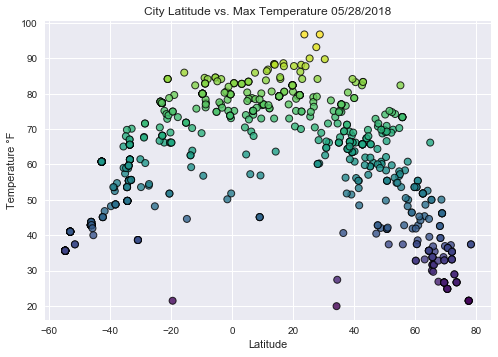

In [42]:
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(cities_df["Latitude"],
            cities_df["Temperature"],c=cities_df["Temperature"],
            marker="o", linewidths=1,
            facecolors="purple",
            cmap='viridis',
            edgecolors="black",
            alpha=0.8)

plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {dt.now().strftime ('%m/%d/%Y')}")
plt.ylabel("Temperature °F")
plt.xlabel("Latitude")

plt.savefig('output/Templatcharttitle.png')

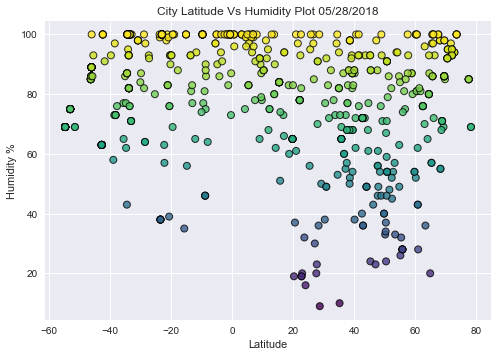

In [43]:
# # Plot scatter plot with Humidity (%) vs. Latitude
plt.scatter(cities_df["Latitude"],
            cities_df["Humidity"],c=cities_df["Humidity"],
            marker="o", linewidths=1,
            facecolors="purple",
            cmap='viridis',
            edgecolors="black",
            alpha=0.8)

# plt.legend()
plt.style.use('seaborn')
# Templatcharttitle= CurDate,"City Latitude vs. Max Temparature (F)"
# plt.axhline(y=0,color='r',linestyle='-')
plt.title(f"City Latitude Vs Humidity Plot {dt.now().strftime ('%m/%d/%Y')}")
# plt.title(Templatcharttitle)
plt.ylabel("Humidity %")
plt.xlabel("Latitude")

plt.savefig('output/Humidvslat.png')

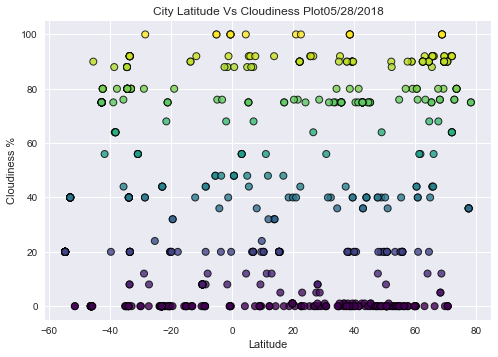

In [44]:
# Plot scatter plot with Humidity (%) vs. Latitude
plt.scatter(cities_df["Latitude"],
            cities_df["Cloudiness"],c=cities_df["Cloudiness"],
            marker="o", linewidths=1,
            facecolors="purple",
            cmap='viridis',
            edgecolors="black",
            alpha=0.8)

# plt.legend()
plt.style.use('seaborn')
plt.title(f"City Latitude Vs Cloudiness Plot{dt.now().strftime ('%m/%d/%Y')}")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.savefig('output/Cloudyvslat.png')

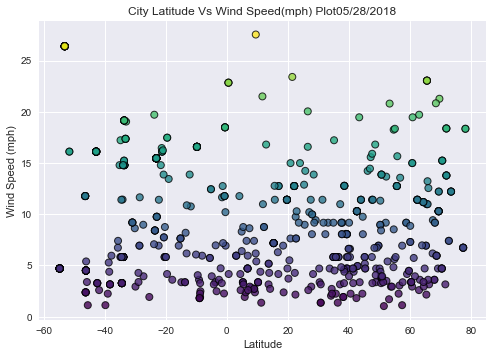

In [45]:
 # Plot scatter plot with Humidity (%) vs. Latitude
plt.scatter(cities_df["Latitude"],
            cities_df["Wind Speed"],c=cities_df["Wind Speed"],
            marker="o", linewidths=1,
            facecolors="purple",
            cmap='viridis',
            edgecolors="black",
            alpha=0.8)

plt.style.use('seaborn')
plt.title(f"City Latitude Vs Wind Speed(mph) Plot{dt.now().strftime ('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('output/Windspeedvslat.png')